In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
sns.set()

In [3]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis=0,inplace = True)
print(df.shape)


(568454, 10)
True
(568411, 10)


In [6]:
df.drop_duplicates(subset=['Score','Text'],inplace = True,keep='first')

In [7]:
df.shape

(393661, 10)

Rectangle(xy=(-0.4, 0), width=0.8, height=250738, angle=0) 250738
Rectangle(xy=(0.6, 0), width=0.8, height=56074, angle=0) 56074
Rectangle(xy=(1.6, 0), width=0.8, height=36277, angle=0) 36277
Rectangle(xy=(2.6, 0), width=0.8, height=29770, angle=0) 29770
Rectangle(xy=(3.6, 0), width=0.8, height=20802, angle=0) 20802


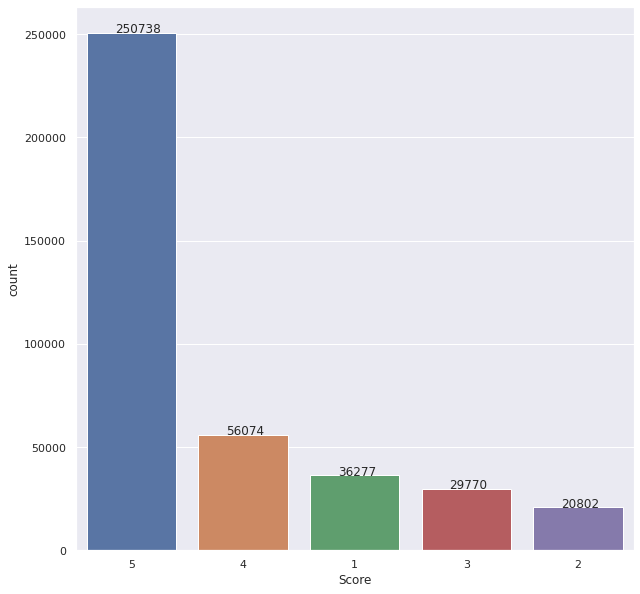

In [8]:
plt.figure(figsize = (10,10))
ax = sns.countplot(df['Score'],order = df['Score'].value_counts().index)
for p, label in zip(ax.patches,df['Score'].value_counts()):
    print(p,label)
    ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.25))
    


In [9]:
df['Score'].value_counts()

5    250738
4     56074
1     36277
3     29770
2     20802
Name: Score, dtype: int64

In [10]:
df.groupby('ProductId').count()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7800648702,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B009SF0TN6,1,1,1,1,1,1,1,1,1
B009SR4OQ2,1,1,1,1,1,1,1,1,1
B009UOFU20,1,1,1,1,1,1,1,1,1


In [11]:
df.groupby('ProductId').count().sort_values(by = 'Text',ascending=False)

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
B007JFMH8M,910,910,910,910,910,910,910,910,910
B002QWP89S,630,630,630,630,630,630,630,630,630
B003B3OOPA,622,622,622,622,622,622,622,622,622
B001EO5Q64,565,565,565,565,565,565,565,565,565
B0013NUGDE,557,557,557,557,557,557,557,557,557
...,...,...,...,...,...,...,...,...,...
B0029JFO1U,1,1,1,1,1,1,1,1,1
B0029JFM3K,1,1,1,1,1,1,1,1,1
B0029JEJR0,1,1,1,1,1,1,1,1,1


In [12]:
df_products = df.groupby('ProductId').filter(lambda x : len(x)>=400)

In [13]:
df_products_group = df_products.groupby('ProductId')

In [14]:
df_products_group

In [15]:
print(len(df_products))
print(len(df_products_group))

12034
23


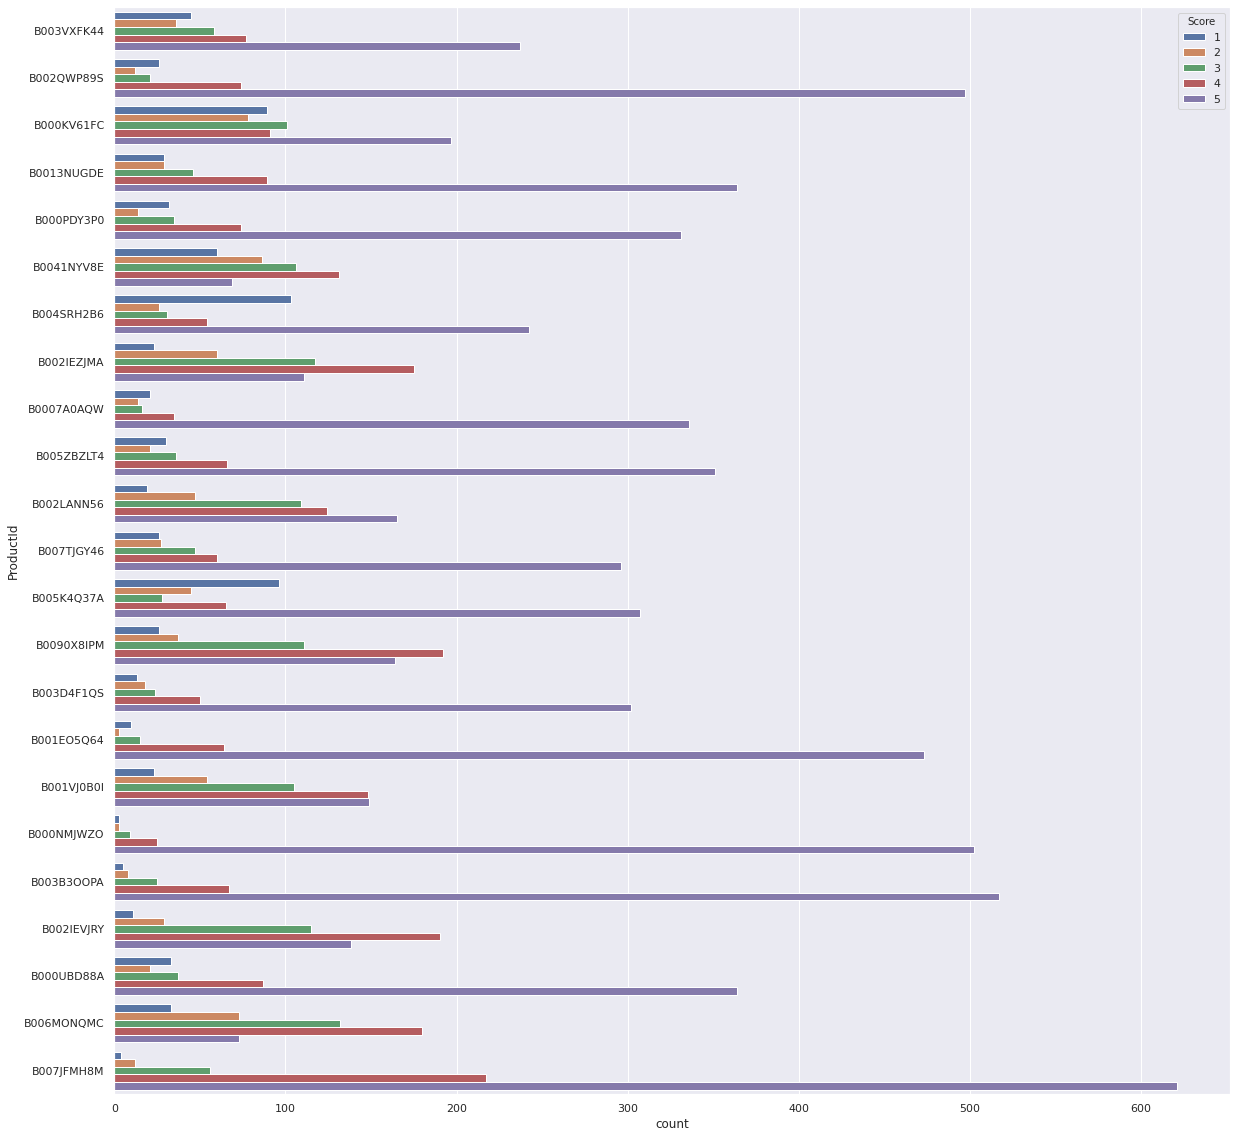

In [16]:
plt.figure(figsize= (20,20))
sns.countplot(y = 'ProductId',hue='Score',data=df_products)

In [17]:
df.groupby('UserId').count().sort_values(by='Score',ascending = False)

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
UserId,,,,,,,,,
AY12DBB0U420B,329,329,329,329,329,329,329,329,329
A3OXHLG6DIBRW8,268,268,268,268,268,268,268,268,268
A281NPSIMI1C2R,243,243,243,243,243,243,243,243,243
A1Z54EM24Y40LL,211,211,211,211,211,211,211,211,211
A1YUL9PCJR3JTY,194,194,194,194,194,194,194,194,194
...,...,...,...,...,...,...,...,...,...
A2E7RQLTP9L6UB,1,1,1,1,1,1,1,1,1
A2E7TF4GTO9D5Z,1,1,1,1,1,1,1,1,1
A2E7UDYVF18X35,1,1,1,1,1,1,1,1,1


In [18]:
df_users = df.groupby('UserId').filter(lambda x : len(x)>=10)
df_users_group = df_users.groupby('UserId')
len(df_users_group)

2555

In [19]:
df_users = df.groupby('UserId').filter(lambda x : len(x)>=5)
df_users_group = df_users.groupby('UserId')
len(df_users_group)

8330

In [20]:
df_users = df.groupby('UserId').filter(lambda x : len(x)>=20)
df_users_group = df_users.groupby('UserId')
len(df_users_group)

712

In [21]:
df_users = df.groupby('UserId').filter(lambda x : len(x)>=50)
df_users_group = df_users.groupby('UserId')
len(df_users_group)

111

In [22]:
df_users = df.groupby('UserId').filter(lambda x : len(x)>=100)
df_users_group = df_users.groupby('UserId')
len(df_users_group)

18

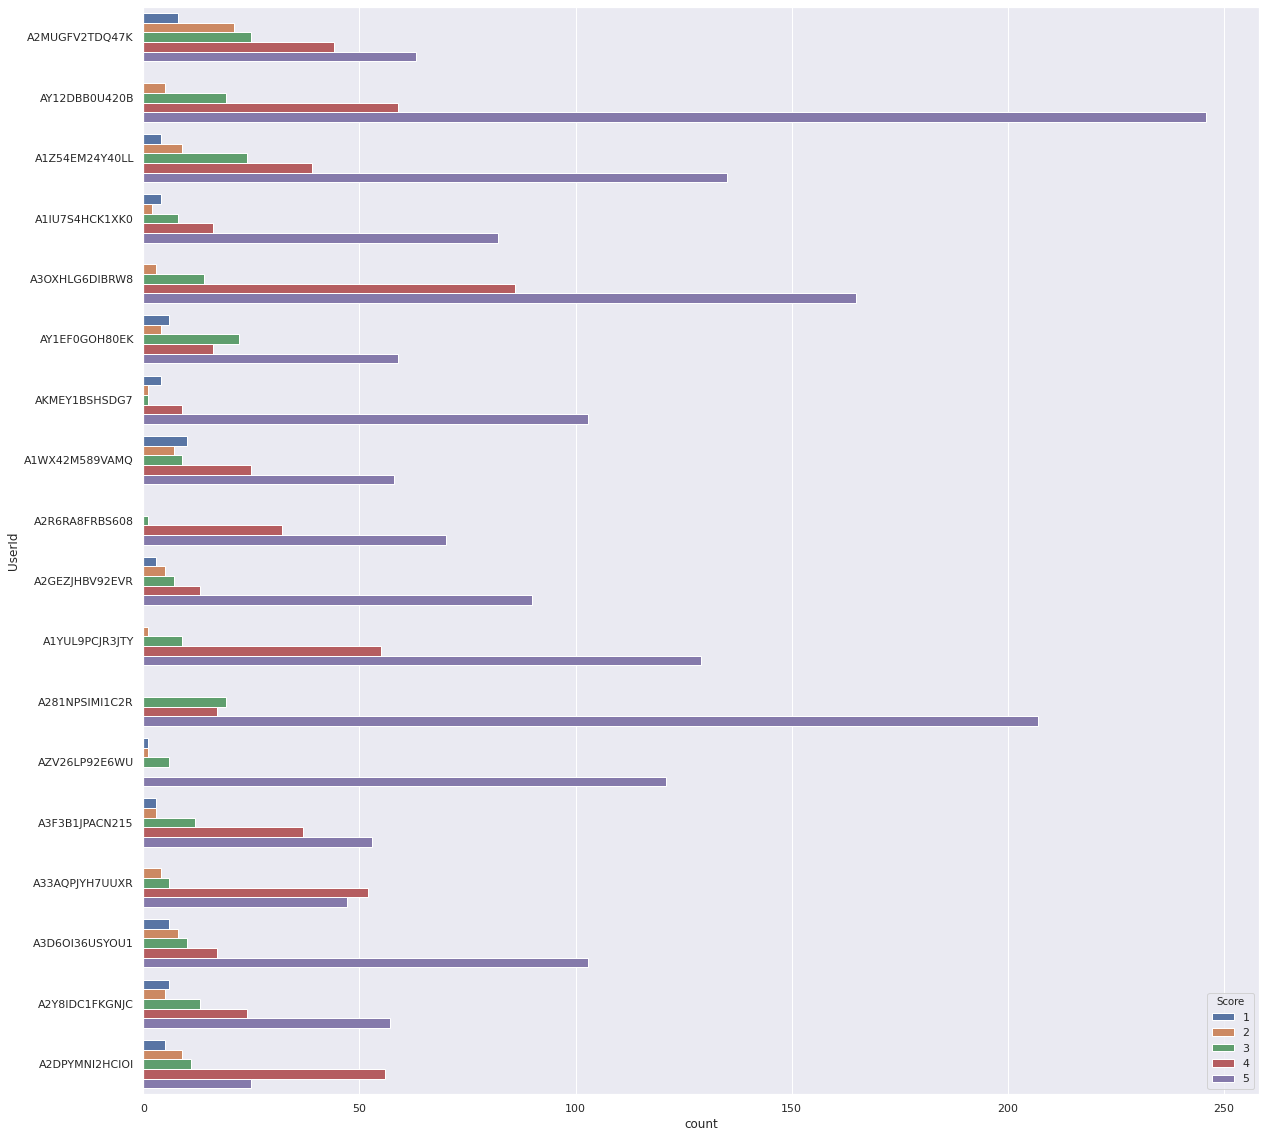

In [23]:
plt.figure(figsize = (20,20))
sns.countplot(y = 'UserId',data=df_users,hue = 'Score')

In [24]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
def remove_stopwords(text):
    words = word_tokenize(text.lower())
    sentence = [w for w in words if not w in stopwords.words('english')]
    return " ".join(sentence)

def lematize_word(text):
    lematized = []
    lematizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            lematized.append(lematizer.lemmatize(word))
    return ' '.join(lematized)  

def clean_text(text):
    delete_dict = {pun : '' for pun in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr = text1.split()
    text2 = ' '.join([w for w in textArr])
    return text2.lower()

In [29]:
df_rating345 = df[(df['Score']==3)|(df['Score']==4)|(df['Score']==5)]
df_rating12 = df[(df['Score']==1)|(df['Score']==2)]

In [30]:
df_rating12['Text'] = df_rating12['Text'].apply(clean_text)
df_rating12['Text'] = df_rating12['Text'].apply(remove_stopwords)
df_rating12['Text'] = df_rating12['Text'].apply(lematize_word)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [31]:
df_rating345['Text'] = df_rating345['Text'].apply(clean_text)
df_rating345['Text'] = df_rating345['Text'].apply(remove_stopwords)
df_rating345['Text'] = df_rating345['Text'].apply(lematize_word)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
df_rating12['num_words_text'] = df_rating12['Text'].apply(lambda x:len(str(x).split()) )
df_rating345['num_words_text'] = df_rating345['Text'].apply(lambda x:len(str(x).split()) )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df_rating12['num_words_text'].describe()

count    57079.000000
mean        43.776222
std         42.088128
min          1.000000
25%         19.000000
50%         32.000000
75%         53.000000
max       1156.000000
Name: num_words_text, dtype: float64

In [42]:
df_rating345['num_words_text'].describe()

count    336582.000000
mean         40.795848
std          41.367516
min           1.000000
25%          17.000000
50%          28.000000
75%          49.000000
max        1975.000000
Name: num_words_text, dtype: float64

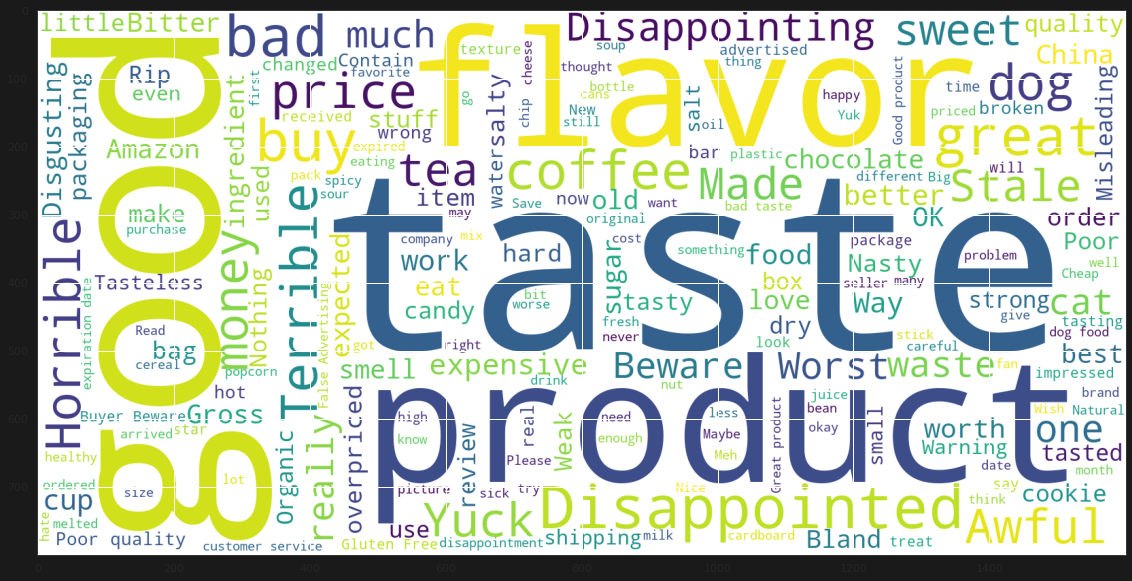

In [48]:
word_cloud = WordCloud(background_color = 'white' , height=800,width = 1600).generate(' '.join(df_rating12['Summary'].tolist()))
plt.figure(figsize =(20,10),facecolor='k')
plt.imshow(word_cloud)


In [ ]:
word_cloud = WordCloud(background_color = 'white' , height=800,width = 1600).generate(' '.join(df_rating345['Summary'].tolist()))
plt.figure(figsize =(20,10),facecolor='k')
plt.imshow(word_cloud)
